# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


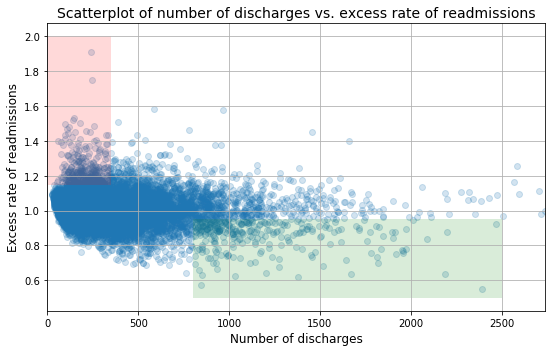

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms
# load the statsmodels package to get access to robust standard errors
import statsmodels.formula.api as smf

$ \color{darkblue} {\bf \large \textrm {Primary Exploratiry Data Analysis } } $

In [8]:
hosp_data = clean_hospital_read_df
hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [9]:
# 'Footnote' column with NaN rows indicating incomplete data entry in that row
# Drop rows with at least 11 non-NaN entry 
hosp_data = clean_hospital_read_df.dropna(thresh = 11)

In [10]:
hosp_data = hosp_data.drop_duplicates() # remove duplicate entries

In [11]:
hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [12]:
hosp_data.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


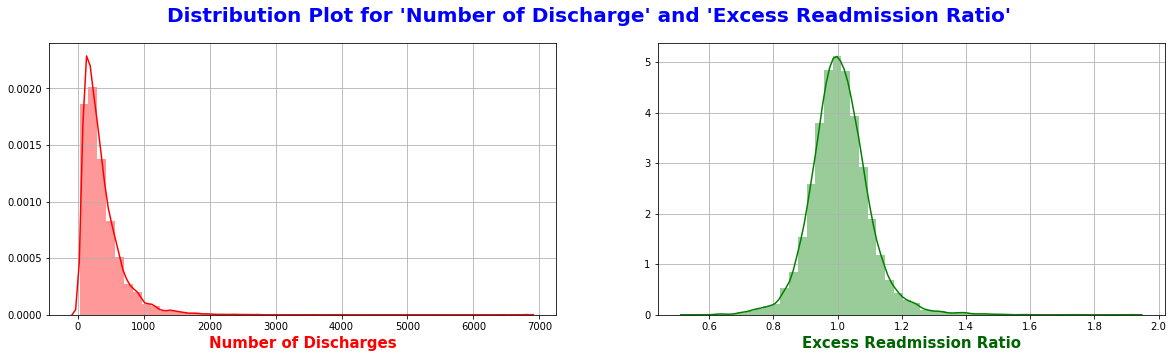

In [13]:
_ = plt.subplots(figsize = (20,5))
_ = plt.suptitle('Distribution Plot for \'Number of Discharge\' and \'Excess Readmission Ratio\'', \
             size =20, color = 'b', fontweight = 'bold')
_ = plt.subplot(121)
_ = sns.distplot(hosp_data['Number of Discharges'],color = 'r')
_ = plt.xlabel('Number of Discharges', color= 'r', size =15, fontweight = 'bold')
_ = plt.grid()
_ = plt.subplot(122)
_ = sns.distplot(hosp_data['Excess Readmission Ratio'], color = 'g')
_ = plt.xlabel('Excess Readmission Ratio', size = 15, color = 'darkgreen', fontweight = 'bold')
_ = plt.grid()
_ = plt.show()

In [14]:
# Ordinary Least Squares for baseic estimates
ols_model = smf.ols('hosp_data["Excess Readmission Ratio"] ~ hosp_data["Number of Discharges"]', \
                    hosp_data).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     hosp_data["Excess Readmission Ratio"]   R-squared:                       0.009
Model:                                               OLS   Adj. R-squared:                  0.009
Method:                                    Least Squares   F-statistic:                     110.1
Date:                                   Fri, 14 Dec 2018   Prob (F-statistic):           1.22e-25
Time:                                           11:33:03   Log-Likelihood:                 11178.
No. Observations:                                  11497   AIC:                        -2.235e+04
Df Residuals:                                      11495   BIC:                        -2.234e+04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.0181      0.001    769.664      0.000       1.016       1.021
hosp_data["Number of Discharges"] -2.901e-05   2.76e-06    -10.492      0.000   -3.44e-05   -2.36e-05
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:blue'> Plot Best-fit-Line for correlation trend. </span>

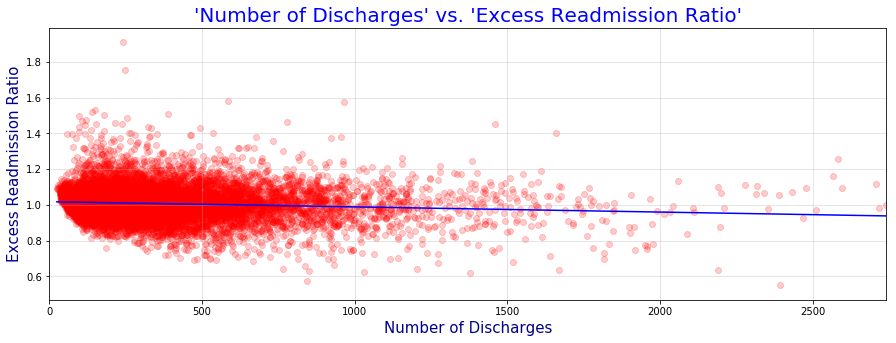

In [15]:
# store fit results in clearer labels
intercept = ols_model.params[0]
slope = ols_model.params[1]

# regenerate improved scatter plot

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in hosp_data['Number of Discharges'][:-3]]
y = list(hosp_data['Excess Readmission Ratio'][:-3])

_ = plt.figure(figsize=(15,5))
_ = plt.scatter(hosp_data['Number of Discharges'], \
                hosp_data['Excess Readmission Ratio'],
                alpha=0.2, c = 'red')

points = np.linspace(hosp_data['Number of Discharges'].min(), \
                     hosp_data['Number of Discharges'].max(), 2)
_ = plt.plot(points, slope*points + intercept, c = 'b')

_ = plt.xlim([0, max(x)])
_ = plt.xlabel('Number of Discharges', size=15, color = 'darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size=15, color = 'darkblue')
_ = plt.title('\'Number of Discharges\' vs. \'Excess Readmission Ratio\'', size=20, color = 'b')
_ = plt.grid(alpha = 0.4)
_ = plt.show()

*****
$ \color{darkblue} {\large {\textrm {A. Do you agree with the above analysis and recommendations? Why or why not?}}} $

### <span style='color:darkblue'> There is $\color{darkblue} {\underline {\bf {\textrm{not enough} } } } $ evidence/detail in dataset to agree with the preliminary report. 
#### <span style='color:darkblue'>     There is some negative correlation ( -0.097 ) as Number of Discharge increases while the Excess Readmission Ratio decreases. Which may be viewed as downward trend. Similarly, a more notable positive correlation ( 0.79 ) appears to be present between Number of Discharge and Number of Readmissions. Which makes sense since a patient had to be discharged before being readmitted.
    
#### <span style='color:darkblue'> This dataset represents data collected over 3 years, 07/01/2010 through 06/30/2013. It is unclear how data distributes over time and if numbers have improved by 2013 or worsend.

#### <span style='color:darkblue'> There are three general scenarios to consider as to how data could have been distributed over time:
> #### <span style='color:darkblue'>1. Number of readmissions were high and declined over time
> #### <span style='color:darkblue'>2. Number of readmissions were low and increased over time
> #### <span style='color:darkblue'>3. Number of readmissions peaked sporadically over time
#### <span style='color:darkblue'> Finally, the cause for excess readmission is not stated and there is not enough information to identify the cause.

****

In [16]:
# Correlation -> Number of Discharges vs Excess Readmission Ratio
hosp_data[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


In [17]:
# Correlation -> Number of Discharges vs Number of Readmissions
hosp_data[['Number of Discharges', 'Number of Readmissions']].corr()

,Number of Discharges,Number of Readmissions
Number of Discharges,1.000000,0.791272
Number of Readmissions,0.791272,1.000000


In [18]:
# Correlation Table for all Features
hosp_data.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


*****
$ \color{darkblue} {\large {\textrm {B. Provide support for your arguments and your own recommendations with a statistically sound analysis:}}} $

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

### 1. Setup an appropriate hypothesis test.

*********
*********
<ol> $ \Large \color{darkblue} {\textrm {Null and Alternate hypothesis} } $ </ol>
<ul><ul>
<li> $ \color{darkgreen} {\large {\textrm {Null Hypothesis, H} \substack{0}:} } \\ $
<ul> $ \color{darkblue}  { {\large \text {Excess Readmission Rate  ( } \Large \hat\mu}{\substack{Discharge<100} \;=\; {\Large \hat\mu} {\substack{Discharge>1000}} } \large) } \\ $ </ul>
<li> $ \color{darkred} {\large {\textrm {Alternate Hypothesis, H} \substack{a}:} } \\ $
<ul> $ \color{darkblue}  { {\large \textrm {Excess Readmission Rate  ( } \Large \hat\mu}{\substack{discharge<100}  \;\neq\;  {\Large \hat\mu} {\substack{discharge>1000}} } \large )} \\ $ </ul>
<li> $ \color{darkblue} {\textrm {Confidence Level = 99} \%\; \implies {\large \alpha} \textrm { = 0.01 = 1} \%} $ 
<li> $ \color{darkblue} {\textrm {Critical propability = }
\begin{align} 1\;-\;{\frac {\large \alpha}{2}} \end{align} 
\textrm { = 0.995}
} $
<ul></ul>

###  2. Compute and report the observed significance value (or p-value).

### <span style = 'color:darkblue'> Calculated p-value $\approx$ 0 , null hypothesis can be rejected

In [19]:
# < 100 discharges and > 1000 Discharges
Discharge_100 = hosp_data[(hosp_data['Number of Discharges'] <= 100)]
Discharge_1000 = hosp_data[hosp_data['Number of Discharges'] >= 1000]

In [20]:
# conduct normal test on number of discharges
stat, p_value = stats.normaltest(hosp_data['Excess Readmission Ratio'])
print('p-value = %.2e' % p_value)

p-value = 0.00e+00


In [21]:
r, p_value = stats.pearsonr(hosp_data['Number of Discharges'], hosp_data['Excess Readmission Ratio'])

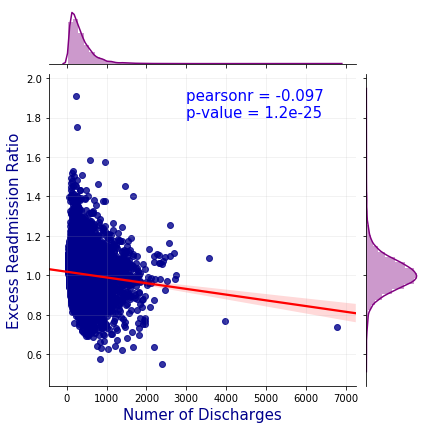

In [22]:
_ = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', \
                  data=hosp_data, kind='reg', color = 'purple', scatter_kws={'color': 'darkblue'}, \
                  line_kws={'color': 'r'}, joint_kws = {'label': 'here is the labe10'})
_ = plt.xlabel('Numer of Discharges', size = 15, color = 'darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size = 15, color = 'darkblue')
_ = plt.text(3000, 1.8, 'pearsonr = %.3f\np-value = %.1e' % (r, p_value), size = 15, color = 'b')
_ = plt.grid(alpha = 0.2)
_ = plt.show()

In [23]:
r, p_value = stats.pearsonr(hosp_data['Number of Discharges'], hosp_data['Number of Readmissions'])

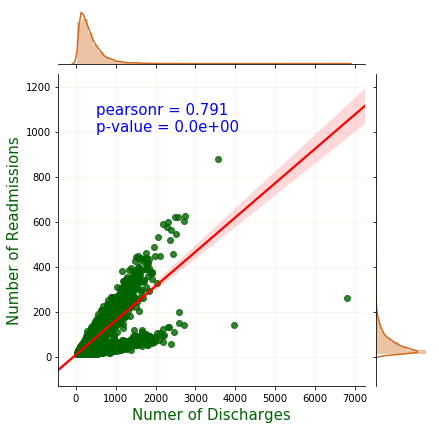

In [24]:
ax1 = sns.jointplot('Number of Discharges', \
                    'Number of Readmissions', \
                    data = hosp_data, \
                    kind ='reg', \
                    scatter_kws = {'color': 'darkgreen'}, \
                    line_kws = {'color': 'red'}, \
                    marginal_kws = {'color':'chocolate'})
_ = plt.xlabel('Numer of Discharges', size = 15, color = 'darkgreen')
_ = plt.ylabel('Number of Readmissions', size = 15, color = 'darkgreen')
_ = plt.text(500, 1000, 'pearsonr = %.3f\np-value = %.1e' % (r, p_value), size = 15, color = 'b')
_ = plt.grid(alpha = 0.1, color = 'chocolate')
_ = plt.show()

In [25]:
#Find means and variances for discharges =< 100 and >= 1000
mean_Discharge_100 = Discharge_100['Excess Readmission Ratio'].mean()
mean_Discharge_1000 = Discharge_1000['Excess Readmission Ratio'].mean()
var_Discharge_100 = Discharge_100['Excess Readmission Ratio'].var()
var_Discharge_1000 = Discharge_1000['Excess Readmission Ratio'].var()
std_Discharge_100 = Discharge_100['Excess Readmission Ratio'].std()
std_Discharge_1000 = Discharge_1000['Excess Readmission Ratio'].std()

In [26]:
Summary = pd.DataFrame(np.transpose([np.round([mean_Discharge_100, var_Discharge_100, std_Discharge_100], 4), \
                                     np.round([mean_Discharge_1000, var_Discharge_1000, std_Discharge_1000], 4), \
                                     np.round([mean_Discharge_100 - mean_Discharge_1000, \
                                               var_Discharge_1000 - var_Discharge_100, \
                                               std_Discharge_1000 - std_Discharge_100], 4)]), \
                       index = ['Mean', 'Variance', 'STD'], \
                       columns = ['Discharges $\leq$ 100 ', 'Discharges $\geq$ 1000','........... $\large\Delta$ ' ] )
Summary

,Discharges $\leq$ 100,Discharges $\geq$ 1000,........... $\large\Delta$
Mean,1.0221,0.9783,0.0438
Variance,0.0034,0.0144,0.0110
STD,0.0582,0.1199,0.0617


*****

### 3. Report statistical significance for $\alpha$ = .01. 

### <span style ='color:darkblue' > The null hypothesis can be rejected based on calculated p-value = 0  \< 0.01 ( $\Large\alpha$ ). There is no statistical significance to support the mean of \'Excess Readmission Ratio\' to remain the same for \'Number of Discharge\' below 100 and over 1000. </span>

#### <span style='color:darkblue'> From the violine plots below, the mean of 'Excess Readmission Ratio' is concentrated between 0.8 and 1.2 as 'Number of Discharges' are scaled in arbitrary ranges. 
> #### <span style='color:darkblue'> As a result, for discharges \< 100, the excess readmission ratio is converging to a ratio of one (Fig. 1).
> #### <span style='color:darkblue'> For a more detailed range scaling of discharges beloww 1000, the excess readmission ratio appears to be flat across each interval (Fig. 2).
> #### <span style='color:darkblue'> As the number of discharges increase over 1000, the ratio starts moving below one (Fig. 3).
>#### <span style='color:darkblue'> The ratio increases closer to 1.2 as number discharges surpass 2500 (Fig.4)
>#### <span style='color:darkblue'> And  then again clearly trends below one for 3750-7000 discharges (Fig. 5). 

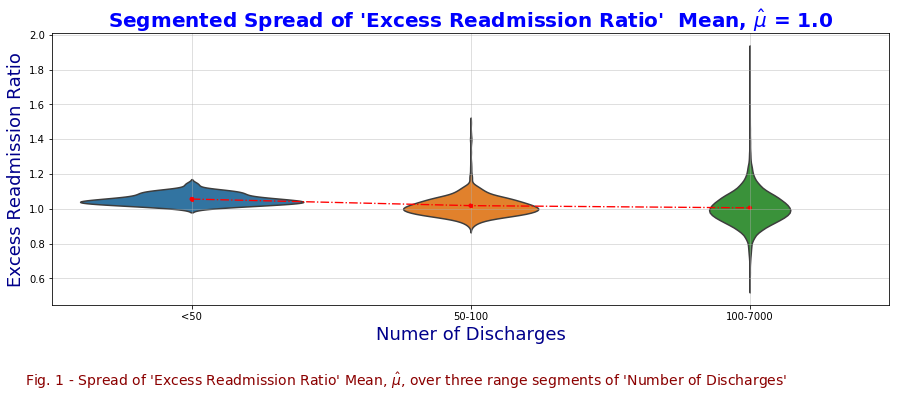

In [27]:
# Apply bin structure to plot spread of mean 
llarge_bins = [0, 50, 100, 7000]
ll_bin_ranges = ['<50','50-100','100-7000']

_ = plt.figure(figsize = (15,5))
_ = plt.clf()
_ = sns.violinplot(data = hosp_data, \
                   x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                              llarge_bins, labels = ll_bin_ranges), \
                   y = 'Excess Readmission Ratio', inner=None)
_ = sns.pointplot(data = hosp_data, \
                  x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                             llarge_bins, labels = ll_bin_ranges), \
                  y = 'Excess Readmission Ratio', \
                  color='r', scale=0.5, linestyles ='-.')
_ = plt.xlabel('Numer of Discharges', size = 18, color='darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size = 18, color='darkblue')
_ = plt.title('Segmented Spread of \'Excess Readmission Ratio\'  Mean, $\hat\mu$ = 1.0', \
              size = 20, color='blue', fontweight = 'bold')
_ = plt.figtext(0.1, -0.1, \
                'Fig. 1 - Spread of \'Excess Readmission Ratio\' Mean, $\hat\mu$, over three range segments of \'Number of Discharges\'', \
                wrap=True, horizontalalignment='left', fontsize=14, color = 'darkred')
_ = plt.grid(alpha=0.5)
_ = plt.show()
_ = plt.clf

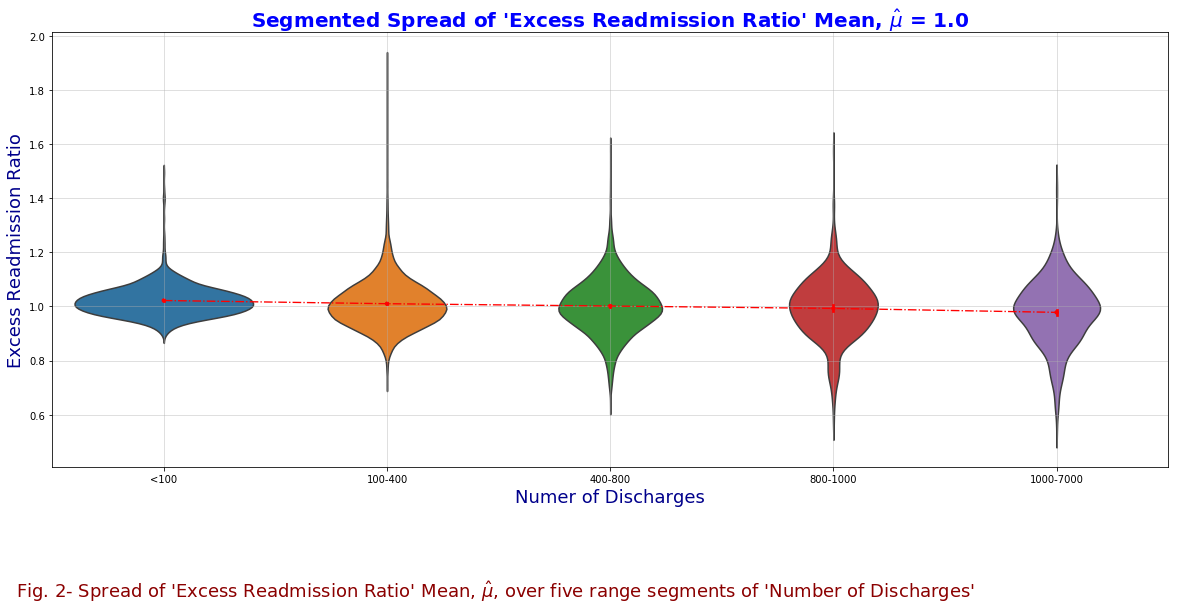

In [28]:
# Apply bin structure to plot spread of mean 
bins = [0, 100, 400, 800, 1000, 7000]
bin_ranges = ['<100','100-400','400-800','800-1000','1000-7000']

_ = plt.figure(figsize = (20,8))
_ = sns.violinplot(data = hosp_data, \
                    x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               bins, labels = bin_ranges), \
                    y = 'Excess Readmission Ratio', inner=None)
points = sns.pointplot(data = hosp_data, \
                  x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               bins, labels = bin_ranges), \
                  y = 'Excess Readmission Ratio', \
                  color='r', scale=0.5, linestyles ='-.')
_ = plt.xlabel('Numer of Discharges', size = 18, color='darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size = 18, color='darkblue')
_ = plt.title('Segmented Spread of \'Excess Readmission Ratio\' Mean, $\hat\mu$ = 1.0', \
              size = 20, color='blue', fontweight = 'bold')
_ = plt.figtext(0.1, -0.1, \
                'Fig. 2- Spread of \'Excess Readmission Ratio\' Mean, $\hat\mu$, over five range segments of \'Number of Discharges\'', \
                wrap=True, horizontalalignment='left', fontsize=18, color = 'darkred')
_ = plt.grid(alpha=0.5)
_ = plt.show()

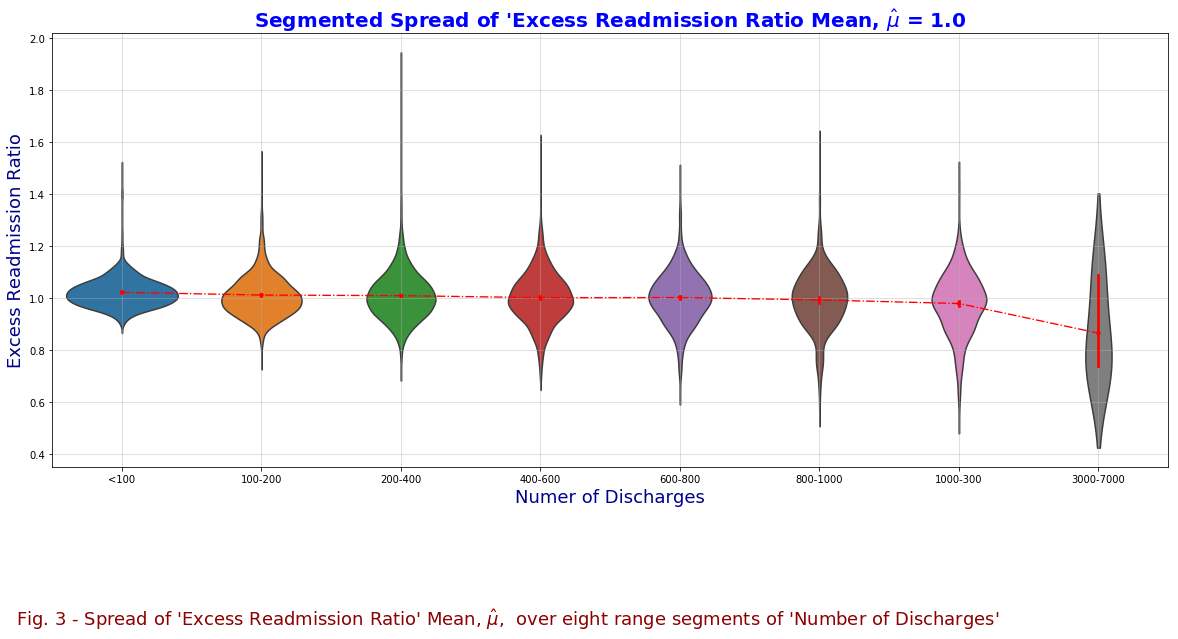

In [29]:
# Apply bin structure to plot spread of mean 
small_bins = [0, 100, 200, 400, 600, 800, 1000, 3000, 7000]
s_bin_ranges = ['<100','100-200','200-400','400-600','600-800','800-1000','1000-300', '3000-7000']

_ = plt.figure(figsize = (20,8))
_ = sns.violinplot(data = hosp_data, \
                    x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               small_bins, labels = s_bin_ranges), \
                    y = 'Excess Readmission Ratio', inner=None)
_ = sns.pointplot(data = hosp_data, \
                  x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               small_bins, labels = s_bin_ranges), \
                  y = 'Excess Readmission Ratio', \
                  color='r', scale=0.5, linestyles ='-.')
_ = plt.xlabel('Numer of Discharges', size = 18, color='darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size = 18, color='darkblue')
_ = plt.title('Segmented Spread of \'Excess Readmission Ratio Mean, $\hat\mu$ = 1.0', \
              size = 20, color='blue', fontweight = 'bold')
_ = plt.figtext(0.1, -0.15, \
                'Fig. 3 - Spread of \'Excess Readmission Ratio\' Mean, $\hat\mu$,  over eight range segments of \'Number of Discharges\'', \
                wrap=True, horizontalalignment='left', fontsize=18, color = 'darkred')
_ = plt.grid(alpha=0.5)
_ = plt.show()

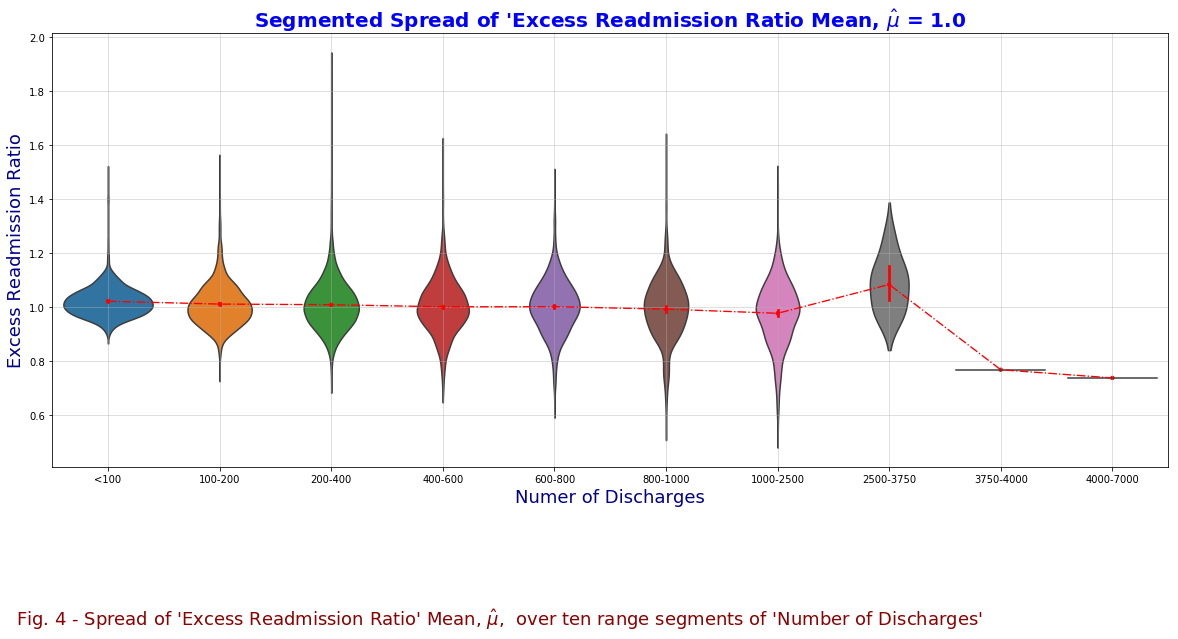

In [30]:
smaller_bins = [0, 100, 200, 400, 600, 800, 1000, 2500, 3750, 4000, 7000]
sr_bin_ranges = ['<100','100-200', '200-400', '400-600','600-800', \
                 '800-1000','1000-2500', '2500-3750', '3750-4000', '4000-7000']

_ = plt.figure(figsize = (20,8))
_ = sns.violinplot(data = hosp_data, \
                    x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               smaller_bins, labels = sr_bin_ranges), \
                    y = 'Excess Readmission Ratio', inner=None)
_ = sns.pointplot(data = hosp_data, \
                  x = pd.cut(hosp_data.loc[:,'Number of Discharges'], \
                               smaller_bins, labels = sr_bin_ranges), \
                  y = 'Excess Readmission Ratio', \
                  color='r', scale=0.5, linestyles ='-.')
_ = plt.xlabel('Numer of Discharges', size = 18, color='darkblue')
_ = plt.ylabel('Excess Readmission Ratio', size = 18, color='darkblue')
_ = plt.title('Segmented Spread of \'Excess Readmission Ratio Mean, $\hat\mu$ = 1.0', \
              size = 20, color='blue', fontweight = 'bold')
_ = plt.figtext(0.1, -0.15, \
                'Fig. 4 - Spread of \'Excess Readmission Ratio\' Mean, $\hat\mu$,  over ten range segments of \'Number of Discharges\'', \
                wrap=True, horizontalalignment='left', fontsize=18, color = 'darkred')
_ = plt.grid(alpha=0.5)
_ = plt.show()

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### <span style = 'color:darkblue'> Here, the statistical significance is inferring statistical evidence to accept or reject the null-hypothesis. It is not implying practical satistical significant.
</span>
   

$ \color{darkblue} {\textrm {The available dataset contains relevant information, however, more detail is required to identify } \bf \underline {causality.}
\\
\textrm {Analyzing the data, correlation is observed between number of discharge, excess readmission ratio, and number of readmissions. }
\\
\textrm {Unfortunately, there was not enough information to identify the cause. Implementing solutions without understanding the cause }
\\
\textrm {will lead to a long and, many times, expensive trial process before an appropriate solution can be proposed or implemented. }
\\
\textrm {Statistical significance is a great tool to move in the right direction when sufficient information is available and the problem is formally defined. } }
$

#### <span style = 'color:darkblue'>    My recommendation:
> #### <span style = 'color:darkblue'>    Design an information acquisition process and optimize efficiency in finding causes for readmissions. 
> #### <span style = 'color:darkblue'>    Prioritize, observe, and identify major differences between hospitals with low and high readmission rates. 
> #### <span style = 'color:darkblue'>    Encourage preventive care as an effort to reduce chances of readmission. 
> #### <span style = 'color:darkblue'>    Promote hospitals to proactively communicate, educate and provide care solutions while actively engaging patients and their families to strive for healthier lifestyle.
</span>

### Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?

#### <span style = 'color:darkblue'> The scatter plot offers a sophisticated appearance, ranges of interest, and constentration of data. 
>#### <span style = 'color:darkblue'>    X-axis represents \'Excess Readmission Ratio\' with pink shaded area designating the approximate range of interest $\approx$ [ 1.18, 2.0 ] 
>#### <span style = 'color:darkblue'>    Y-axis represents \'Number of Discharges\' with green shaded area designating the approximate range of interest $\approx$ [ 800, 2000 ]
>#### <span style = 'color:darkblue'>    Scatter points representing all \'Excess Readmission Ratio\' points corresponding to \'Number of Discharges\'
#### <span style = 'color:darkblue'>    $\underline{Advantage}$ : The plot is providing visual focus of the problem area and is a great first look presentation of issue at hand.
#### <span style = 'color:darkblue'>    $\underline{Disadvantage}$ : Althought the scatter points are indicative of spread of the data in respect to the axis, it lacks detail such as trend and frequency of occurances.